In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# DataFrame Overview

In [2]:
df_pr = pd.read_csv("FINAL.csv")
df_pr.head(10)

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
0,2011,Border,784000.0,517440.0,66.0
1,2011,Dublin,2523000.0,2119320.0,84.0
2,2011,Ireland,9149700.0,7136766.0,78.0
3,2011,Mid-East,1314900.0,1143963.0,87.0
4,2011,Mid-West,933600.0,718872.0,77.0
5,2011,Midlands,567600.0,448404.0,79.0
6,2011,South-East,820600.0,582626.0,71.0
7,2011,South-West,1324600.0,1006696.0,76.0
8,2011,West,881600.0,696464.0,79.0
9,2012,Border,784200.0,588150.0,75.0


In [3]:
df_pr.shape

(108, 5)

In [4]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                108 non-null    int64  
 1   Region                              108 non-null    object 
 2   Estimated Population nr             108 non-null    float64
 3   Nr of Persons with Internet Access  108 non-null    float64
 4   % of Persons with Internet Access   108 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.3+ KB


## Data Analysis

In [5]:
df_pr.nunique(axis = 0)

Year                                   12
Region                                  9
Estimated Population nr               108
Nr of Persons with Internet Access    108
% of Persons with Internet Access      58
dtype: int64

In [6]:
df_pr["Region"].unique()

array(['Border', 'Dublin', 'Ireland', 'Mid-East', 'Mid-West', 'Midlands',
       'South-East', 'South-West', 'West'], dtype=object)

### Features Correlation

In [7]:
corr_matrix = df_pr.corr(numeric_only=True)
print(corr_matrix)

                                        Year  Estimated Population nr  \
Year                                1.000000                 0.031915   
Estimated Population nr             0.031915                 1.000000   
Nr of Persons with Internet Access  0.074715                 0.997264   
% of Persons with Internet Access   0.829971                 0.155767   

                                    Nr of Persons with Internet Access  \
Year                                                          0.074715   
Estimated Population nr                                       0.997264   
Nr of Persons with Internet Access                            1.000000   
% of Persons with Internet Access                             0.199911   

                                    % of Persons with Internet Access  
Year                                                         0.829971  
Estimated Population nr                                      0.155767  
Nr of Persons with Internet Access             

<Axes: >

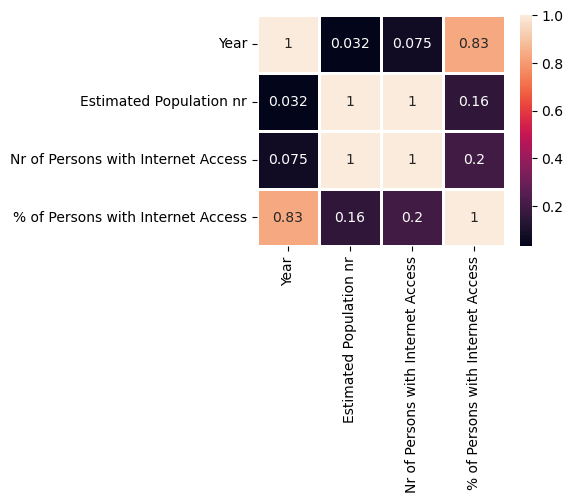

In [8]:
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix,annot=True,linecolor="white",lw=1)

In [9]:
#Looking for the Missing Values
df_pr.isnull().sum()

Year                                  0
Region                                0
Estimated Population nr               0
Nr of Persons with Internet Access    0
% of Persons with Internet Access     0
dtype: int64

In [10]:
df_pr["Region"].unique()

array(['Border', 'Dublin', 'Ireland', 'Mid-East', 'Mid-West', 'Midlands',
       'South-East', 'South-West', 'West'], dtype=object)

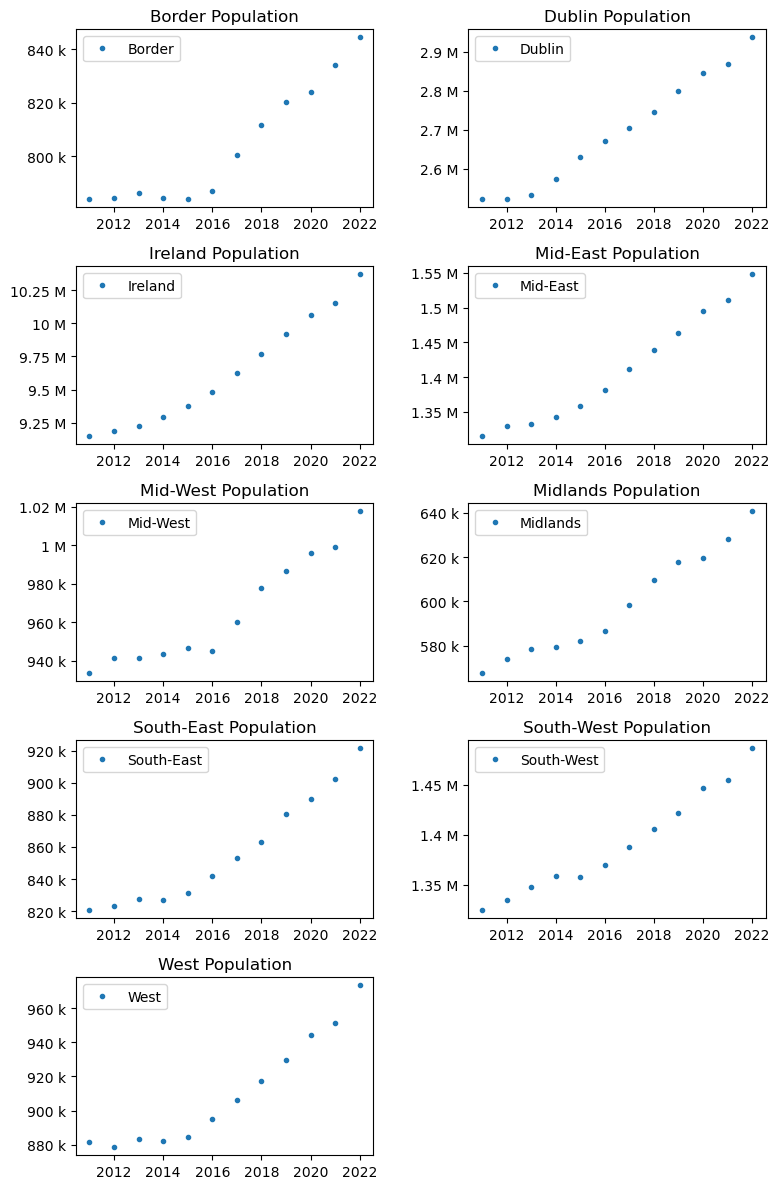

In [12]:
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker


# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(8, 12))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df_pr['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df_pr['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df_pr[df_pr['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['Estimated Population nr'],'.', label=region)
    ax.legend()
    ax.set_title(f'{region} Population')
    
    # Set the Y axis scale to have readable format for numbers
    formatter = ticker.EngFormatter()
    ax.yaxis.set_major_formatter(formatter)

# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

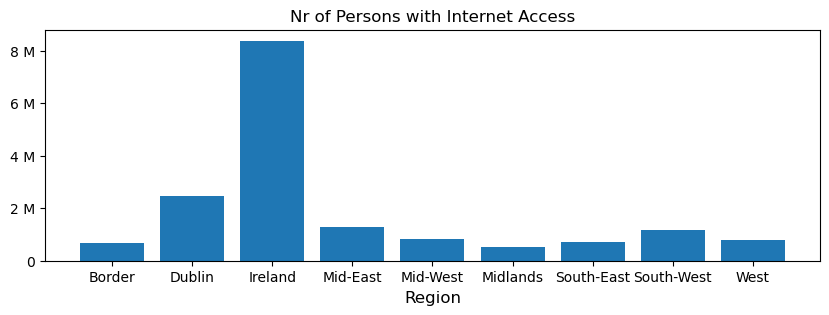

In [13]:
import matplotlib.ticker as ticker
#plt.figure(figsize=(10,3))
fig, ax = plt.subplots(figsize=(10, 3))
plt.bar(df_pr.groupby('Region')['Region'].count().index,df_pr.groupby('Region')['Nr of Persons with Internet Access'].mean())
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel("Region",fontsize=12)
plt.title("Nr of Persons with Internet Access")
plt.show()

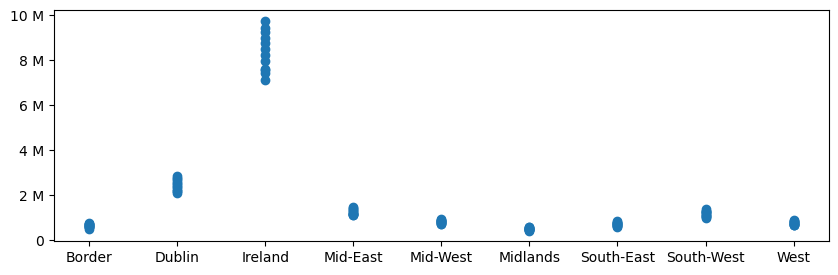

In [14]:
#BOX PLOT?????
plt.figure(figsize=(10,3))
plt.scatter(df_pr.Region,df_pr['Nr of Persons with Internet Access'])
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())

In [15]:
df_filter = df_pr.drop(df_pr[(df_pr["Region"] != 'Ireland') ].index)

In [16]:
df_filter.head()

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
2,2011,Ireland,9149700.0,7136766.0,78.0
11,2012,Ireland,9187300.0,7441713.0,81.0
20,2013,Ireland,9229300.0,7568026.0,82.0
29,2014,Ireland,9291000.0,7618620.0,82.0
38,2015,Ireland,9375600.0,7969260.0,85.0


In [17]:
corr_matrix = df_filter.corr(numeric_only=True)
print(corr_matrix)

                                        Year  Estimated Population nr  \
Year                                1.000000                 0.983099   
Estimated Population nr             0.983099                 1.000000   
Nr of Persons with Internet Access  0.996415                 0.990084   
% of Persons with Internet Access   0.991354                 0.963060   

                                    Nr of Persons with Internet Access  \
Year                                                          0.996415   
Estimated Population nr                                       0.990084   
Nr of Persons with Internet Access                            1.000000   
% of Persons with Internet Access                             0.991302   

                                    % of Persons with Internet Access  
Year                                                         0.991354  
Estimated Population nr                                      0.963060  
Nr of Persons with Internet Access             

<Axes: >

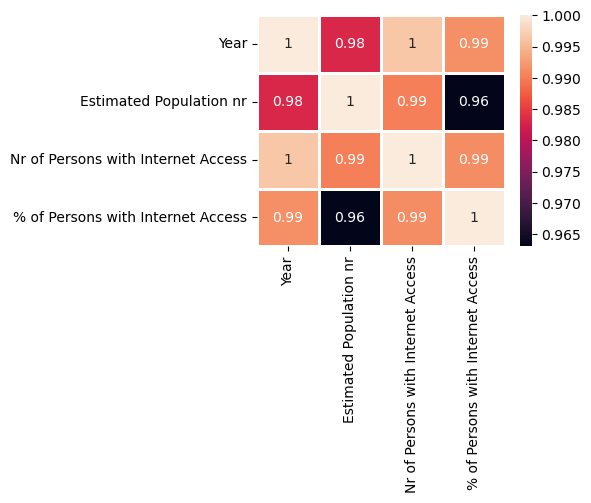

In [18]:
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix,annot=True,linecolor="white",lw=1)

In [133]:
# pd.crosstab(df.Region,df['Year']).plot(kind='bar') Region vs have or bot 95% of IA

**Creating labels for categorical data**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
dfle = df_filter
dfle.Region = le.fit_transform(dfle.Region)

In [21]:
dfle.head(10)

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
2,2011,0,9149700.0,7136766.0,78.00
11,2012,0,9187300.0,7441713.0,81.00
20,2013,0,9229300.0,7568026.0,82.00
29,2014,0,9291000.0,7618620.0,82.00
38,2015,0,9375600.0,7969260.0,85.00
47,2016,0,9479400.0,8247078.0,87.00
56,2017,0,9621800.0,8491238.5,88.25
65,2018,0,9769800.0,8743971.0,89.50
74,2019,0,9917000.0,8999677.5,90.75
83,2020,0,10059700.0,9254924.0,92.00


### Predicting Estimated population for each region

**Taking columns for modeling and split the data**

In [22]:
#df = dfle.drop(dfle[(dfle["Region"] != 2) ].index)

In [23]:
#df.head(10)

In [24]:
#df = dfle[['Year','% of Persons with Internet Access']]

In [25]:
X = dfle[['Year']]
y = dfle['Estimated Population nr']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [27]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 1), (12,), (8, 1), (4, 1), (8,), (4,))

In [28]:
linear = LinearRegression()
linear.fit(X,y)

LinearRegression()

In [29]:
linear.coef_

array([113031.11888112])

In [30]:
linear.predict([[2026]])

array([10706953.96270397])

In [31]:
linear.score(X,y)

0.966484552040646

In [32]:
linear.score(X_test,y_test)

0.979369835516778

In [33]:
linear.score(X_train,y_train)

0.9583741643544905

In [38]:
y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

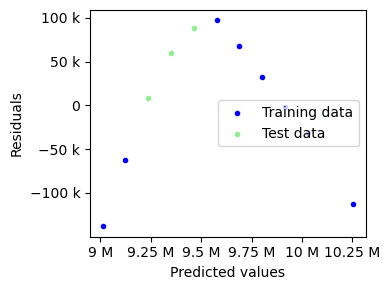

In [42]:
plt.figure(figsize=(4,3))
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = '.', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = '.', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'right') #move legend
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter())
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

**Let's try Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = '.', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = '.', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter())
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [ ]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

In [ ]:
# alpha = 0.1 is a parameter using a fit() method
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

In [ ]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
X = df_log.drop('Region',axis='columns')
y = df_log['Region']
logistic.fit(X_train,y_train)

#### Regularisation L1

In [482]:

from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=1000,tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, tol=0.1)

In [483]:
lasso_reg.score(X_test,y_test)

0.9588018738665427

In [484]:
lasso_reg.score(X_train,y_train)

0.9618448731936915

#### Regularisation L2

In [34]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50,max_iter=100,tol=0.1)

# Train the Ridge() mode by calling a fit() method
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [36]:
# Display the score by using ridge object
print("Training set score: {:.3f}".format(ridge_reg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge_reg.score(X_test, y_test)))

Training set score: 0.856
Test set score: 0.770


In [152]:
#df = dfle[['Year','Region','Estimated Population nr','Nr of Persons with Internet Access']]

In [153]:
#X = df.drop('Nr of Persons with Internet Access',axis='columns')
#y = df['Nr of Persons with Internet Access']

In [154]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [155]:
#X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((108, 3), (108,), (75, 3), (33, 3), (75,), (33,))

In [65]:
y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

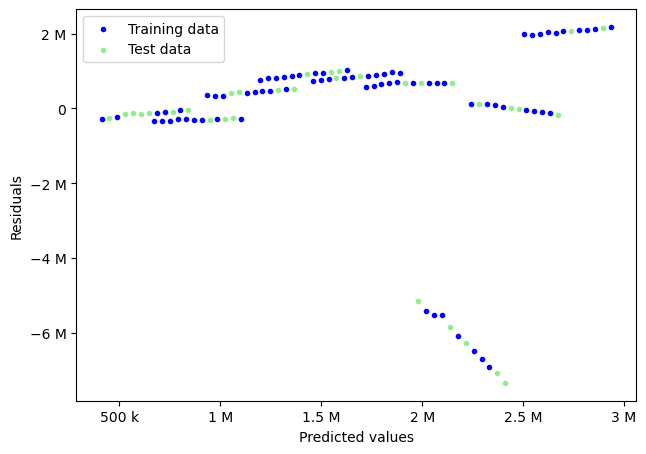

In [75]:
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = '.', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = '.', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter())
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()